<a href="https://colab.research.google.com/github/kaarlosasiang/itban3-activities/blob/main/LabActivity2_Sasiang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratory Exrcise #2**

1. Using the Colab notebook, import the following packages/ libraries/ modules:

  - OS

  - Numpy

  - Pandas

  - Matplotlib

  - Seaborn

  - Warnings (to suppress warnings)

In [87]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os.path
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

# Define Paths, Variables & Methods
drive_path = '/content/drive'
file_path = drive_path + "/MyDrive/Colab Notebooks/loans.csv"
index_col = 'client_id'

def check_outliers(df, col, method = "iqr", threshold=3.5):
  if method == "iqr":
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    df["outlier_" + col] = (df[col] < lower_bound) | (df[col] > upper_bound)

  elif method == "zscore":
    mean = df[col].mean()
    std = df[col].std()
    z_scores = (df[col] - mean) / std

  else:
    raise ValueError("Invalid method. Choose 'iqr' or 'zscore'. ")


# Mount Drive if !mounted
if not os.path.ismount(drive_path):
  drive.mount(drive_path)

2. Import and load the dataset. Set the client_id as the index.

3. Display the contents of the dataset by showing its first 5 rows.

In [88]:
#  Import Dataset & set client_id as the index
df = pd.read_csv(file_path, index_col = index_col)

# Showing the first 5 rows
df.head(5)


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


4. Check the info of the dataset and the datatypes for each columns

5. Determine whether the dataset has missing values.

In [89]:
df.info()

if df.isnull().any().any():
  print("Dataset has missing values")
else:
  print("\nDataset has no missing values")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB

Dataset has no missing values


6. Check if there is a presence of outliers using Boxplot.

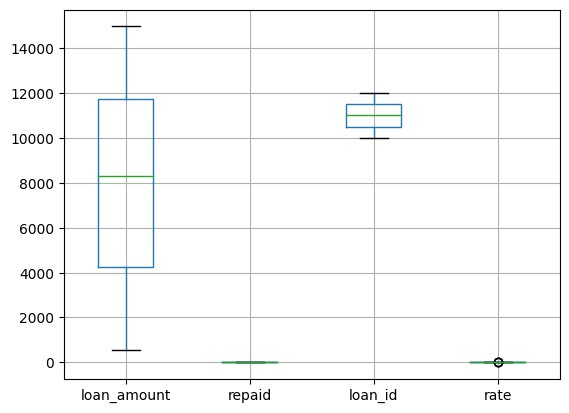

In [90]:
df.boxplot()
plt.show()

7. If there are a presence of outliers, do the following and explain the results:

a. Treat them using SQRT transformation

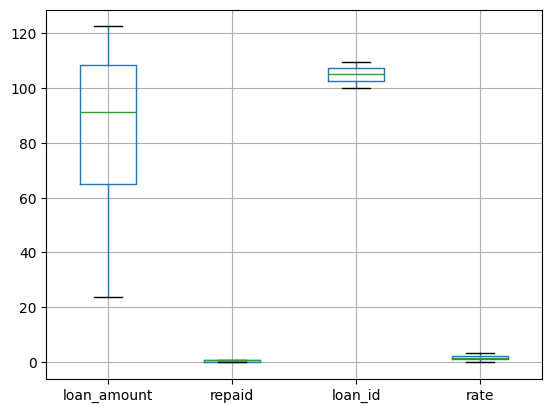

In [91]:
df_sqrt_transformed = df.copy()
numerical_cols = df_sqrt_transformed.select_dtypes(include=[np.number]).columns
df_sqrt_transformed[numerical_cols] = np.sqrt(df_sqrt_transformed[numerical_cols])

df_sqrt_transformed.boxplot()
plt.show()

b. Treat them using the capping approach: Z-Score.

In [92]:
z_scores = np.abs(stats.zscore(df[numerical_cols]))
threshold = 3
df_z_capped = df[(z_scores < threshold).all(axis=1)]

print(f"Number of rows before capping: {df.shape[0]}")
print(f"Number of rows after capping: {df_z_capped.shape[0]}")

Number of rows before capping: 443
Number of rows after capping: 440


8. Upon checking the datatypes for each columns, for numerical variables, apply scaling using Min-Max Normalization. Display the skewness and kurtosis graphs for Loan Amount and explain the results.

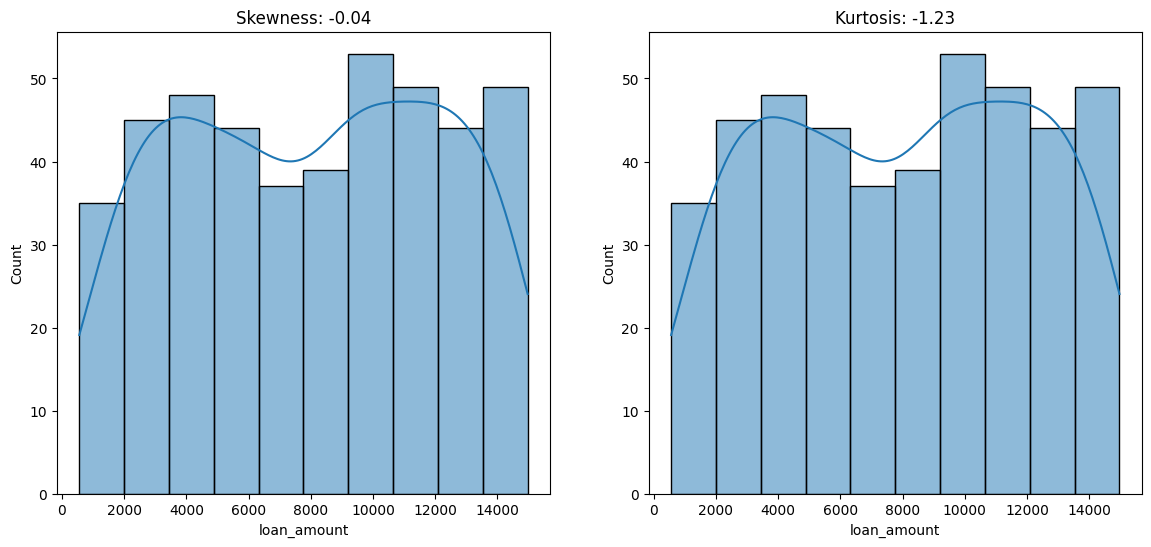

In [93]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

df.head()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['loan_amount'], kde=True)
plt.title(f'Skewness: {round(skew(df["loan_amount"]), 2)}')

plt.subplot(1, 2, 2)
sns.histplot(df['loan_amount'], kde=True)
plt.title(f'Kurtosis: {round(kurtosis(df["loan_amount"]), 2)}')

plt.show()

9. As for the categorical features, apply encoding of categorical variables into dummy variables using pd.get_dummies approach. Show the first five (5) rows.

In [94]:
df_with_dummies = pd.get_dummies(df, drop_first=True)

print(df_with_dummies.head())

           loan_amount  repaid  loan_id  rate  loan_type_credit  \
client_id                                                         
46109            13672       0    10243  2.15                 0   
46109             9794       0    10984  1.25                 1   
46109            12734       1    10990  0.68                 0   
46109            12518       1    10596  1.24                 0   
46109            14049       1    11415  3.13                 1   

           loan_type_home  loan_type_other  loan_start_2000-03-06  \
client_id                                                           
46109                   1                0                      0   
46109                   0                0                      0   
46109                   1                0                      0   
46109                   0                0                      0   
46109                   0                0                      0   

           loan_start_2000-03-08  loan_start_2

10. Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.

In [95]:
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])
df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days / 365

print(df[['loan_start', 'loan_end', 'loan_tenure']].head())

          loan_start   loan_end  loan_tenure
client_id                                   
46109     2002-04-16 2003-12-20     1.679452
46109     2003-10-21 2005-07-17     1.739726
46109     2006-02-01 2007-07-05     1.421918
46109     2010-12-08 2013-05-05     2.408219
46109     2010-07-07 2012-05-21     1.873973


11. Split the data into training and test sets with 80-20 division.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_amount', axis=1)
y = df['loan_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
